# Batch Reactor with Multiple Reactions

### The simulation is adapted from: http://www.learncheme.com/simulations/kinetics-reactor-design/batch-reactor-with-multiple-reactions


The concentrations of five species are plotted as a function of dimensionless time, for three irreversible, elementary, liquid-phase reactions in an isothermal batch reactor. Use sliders to change the dimensionless rate constants for each reaction. The initial amounts of A and B in the reactor are 10 mol and 5 mol, respectively. *Use buttons to plot just one concentration or all five together.*
<br>
The reactions are:
<br>
A + B → C
<br>
C → 2E 
<br>
2A → D

Three liquid-phase reactions take place in an isothermal batch reactor:
<br>
A + B → C, with reaction rate $r1 = k1C_{A}C_{B}$
<br>
C → 2E with reaction rate $r2 = k2C_{C}$
<br>
2A → D with reaction rate $r3 = k3C_{A}^{2}$
<br>
where Ci is the concentration of component i, ri is the rate of reaction, and ki is the rate constant.

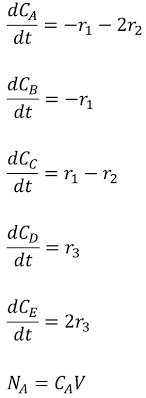

where t is time, NA are moles of A, and V is reactor volume. Initially 10 moles of A and 5 moles of B are fed into the reactor.


## Import Libraries:

In [1]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt 
from IPython.html.widgets import interact
from scipy.integrate import odeint

plt.style.use('bmh')

C:\Users\public\anaconda3\lib\site-packages\IPython\html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


### Review for batch reactor: https://encyclopedia.che.engin.umich.edu/Pages/Reactors/Batch/Batch.html

## Function of bactch reactor combine with interactive representation

In [105]:
def batch_reactor(k1 = 0.5,k2 = 0.5,k3 = 0.5):
    

    # Ignore the volume in this model because the batch reactor is function of time
    # time: independent variable
    # C: dependent variable
    def batch_solver (Y, t):
        
        # Define the vector Y including the five components 
        Ca = Y[0] 
        Cb = Y[1]
        Cc = Y[2]
        Cd = Y[3]
        Ce = Y[4]
        
        # Define the explicit rates of the three reactions
        r1 = k1*Ca*Cb
        r2 = k2*Cc
        r3 = k3*Ca**2
        
        # Define mass balance on each component due to the multiple ractions going on in the reactor
        dCadt = -r1 - 2*r2
        dCbdt = -r1
        dCcdt = r1 - r2
        dCddt = r3
        dCedt = 2*r3
        
        return [dCadt, dCbdt, dCcdt, dCddt, dCedt]
    
    
    t = np.linspace(0,5,1000)

    Na0 = 10 # moles
    Nb0 = 5  # moles
    V =  100 # liters
    
    Ca0 = Na0/V # initial component in the batch reactor
    Cb0 = Nb0/V # initial component in the bacth reactor 
    Y0 = [Ca0, Cb0, 0, 0 , 0] # five component

    Sol = odeint(batch_solver, Y0, t)
    
    Na = Sol[:,0]*V
    Nb = Sol[:,1]*V
    Nc = Sol[:,2]*V
    Nd = Sol[:,3]*V
    Ne = Sol[:,4]*V
    
    # Plotting section
    plt.figure(figsize=(10, 6))
    
    plt.plot(t,Na, label='A component')
    plt.plot(t,Nb, label='B component')
    plt.plot(t,Nc, label='C component')
    plt.plot(t,Nd, label='D component')
    plt.plot(t,Ne, label='E component')

    
    
    plt.ylim([0,10])
    plt.xlim([0,5])
    
    plt.ylabel(r'moles of species')
    plt.xlabel(r'time')
    plt.title(r'Langmuir adsorption model for two components')
    plt.legend(loc = 'best')
    
    # optional
    plt.style.use('ggplot')
    

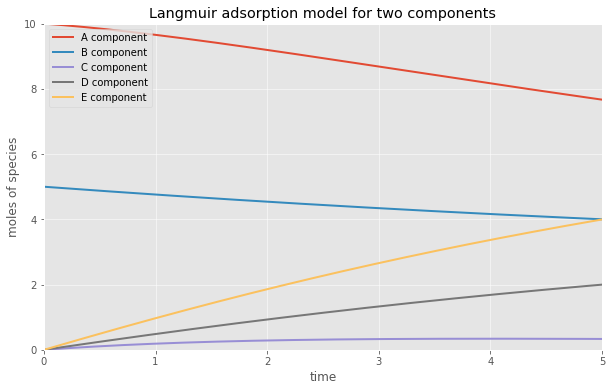

In [106]:
batch_reactor (0.5,0.5,0.5)

## Interactive Output:

In [107]:
interact (batch_reactor, k1 = (0,1,0.1), k2 = (0,1,0.1), k3 = (0,1,0.1))

interactive(children=(FloatSlider(value=0.5, description='k1', max=1.0), FloatSlider(value=0.5, description='k…

<function __main__.batch_reactor(k1=0.5, k2=0.5, k3=0.5)>

Kindly note the volume of the reactor is assumed to be 100 liters but can be changed in the code.
<br>
**This code is an open source code; any contribution is welcomed.**
<br> 
**Please use the link of the webpage in your browser as a way to show that the code is extracted from this repository, incase used by you in the future.**
<br>
for example (this link for othe code): https://github.com/jeff-ball/Machine-Learning-Chemical-Engineering-Approach/blob/main/Reactordesign1.ipynb
<br> 
<br>
$$ Thank YOU! $$